In [1]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [2]:
# Read in the Excel file 'randstad.xlsx' as a dataframe
randstad_network = pd.read_excel('Data_files/Graph_randstad.xlsx')

# Show contents of the dataframe
randstad_network

,Cities,Population,Employees,Latitude,Longitude,0,1,2,3,4,...,11,12,13,14,15,16,17,18,19,20
0,Alkmaar,111834,122.202757,52.6316,4.753400,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Almere,222825,243.484355,52.3508,5.264700,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Alphen aan de Rijn,114182,124.768454,52.1112,4.647300,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
3,Amersfoort,160759,175.663868,52.1561,5.387800,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Amsterdam,918117,1003.240776,52.3676,4.904100,0,1,0,0,0,...,0,0,1,0,1,0,0,1,1,0
5,Delft,106086,115.921828,52.0116,4.357100,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
6,Den Haag,562839,615.022960,52.0705,4.300700,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
7,Dordrecht,121434,132.692827,51.8133,4.690100,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
8,Gouda,75316,82.298969,52.0115,4.710500,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
9,Haarlem,165396,180.730791,52.3874,4.646299,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0


In [3]:
# Make a graph from the dataframe
randstad_network_adjacency = randstad_network.iloc[:, 5:]
Randstad_Graph = nx.from_pandas_adjacency(randstad_network_adjacency)

In [4]:
# Giving the nodes the city names

# Getting the city names from the original dataframe
city_names = []
for city in randstad_network['Cities']:
    city_names.append(city)

# Renaming the nodes in the created graphs
for i in range(len(city_names)):
    nx.relabel_nodes(Randstad_Graph, {i: city_names[i]}, copy=False)

# Also fixing/renaming the original dataframe
for i,name in enumerate(city_names):
    randstad_network.rename(columns={i: name}, inplace=True)

# Checking whether the nodes have the desired names
print(nx.nodes(Randstad_Graph))

['Alkmaar', 'Almere', 'Alphen aan de Rijn', 'Amersfoort', 'Amsterdam', 'Delft', 'Den Haag', 'Dordrecht', 'Gouda', 'Haarlem', 'Hilversum', 'Leiden', 'Rotterdam', 'Schiphol Haarlemmermeer', 'Spijkenisse', 'Utrecht', 'Vlaardingen', 'Westland', 'Woerden', 'Zaanstad', 'Zoetermeer']


In [5]:
# Kept the shortest path in, despite having no length or time yet for each path, so default weight of each edge is 1
dsp = nx.shortest_path(Randstad_Graph, source='Amsterdam', target='Delft')
print(dsp)

['Amsterdam', 'Haarlem', 'Leiden', 'Den Haag', 'Delft']


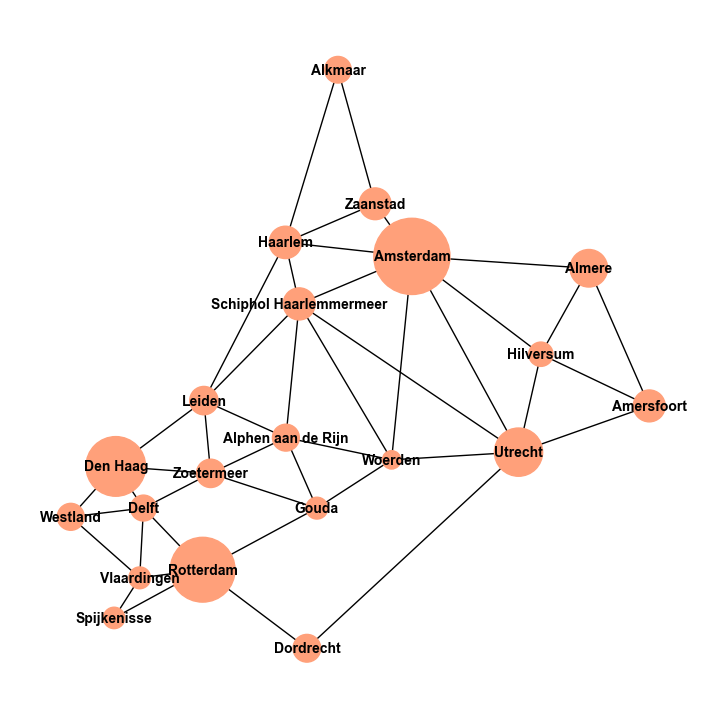

In [6]:
# Plotting the graph

# Gathering attributes for the graph
employees_attributes = []  # For node size drawing, this must be list with data ordered in the order of nodes in the graph
pos_attributes = {}

for city in Randstad_Graph.nodes():
    # The coordinates
    latitude = randstad_network.loc[randstad_network['Cities'] == city, 'Latitude'].iloc[0]
    longitude = randstad_network.loc[randstad_network['Cities'] == city, 'Longitude'].iloc[0]
    pos_attributes.update({city: (longitude, latitude)})
    
    # The employees
    employees = randstad_network.loc[randstad_network['Cities'] == city, 'Employees'].iloc[0]
    employees_attributes.append(employees)
    
    
# Adjust the figure size as needed
plt.figure(figsize=(7, 7))

# Actually drawing the network
nx.draw(Randstad_Graph, 
        pos=pos_attributes, 
        with_labels=True, 
        node_size=[3 * i for i in employees_attributes], 
        node_color='lightsalmon', 
        font_size=10, 
        font_color='black', 
        font_weight='bold'
        )
    


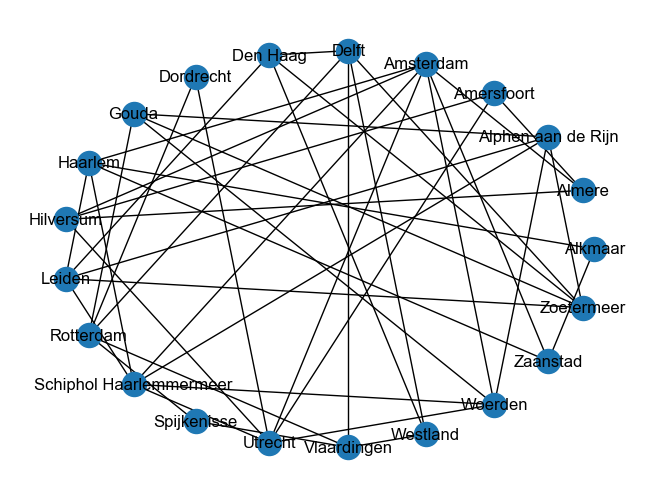

In [7]:
# Plot the graph, using a circular layout
nx.draw_circular(Randstad_Graph, with_labels=True)

### Do note that none of the connections within our graph have either a Time or Length

Therefore, the betweenness calculation might still be useful, but not yet done. We should still implement the next step of giving edges attributes before we fully can complete our first stage of analyses.



In [8]:
#Calculate the betweenness centrality, don't normalize
betweenness = nx.betweenness_centrality(Randstad_Graph,k=None,normalized=False)
betweenness

{'Alkmaar': 0.0,
 'Almere': 1.2023809523809523,
 'Alphen aan de Rijn': 9.482287157287157,
 'Amersfoort': 1.5075757575757576,
 'Amsterdam': 36.352453102453104,
 'Delft': 14.831421356421355,
 'Den Haag': 16.9512987012987,
 'Dordrecht': 20.752597402597406,
 'Gouda': 18.410606060606064,
 'Haarlem': 25.961904761904762,
 'Hilversum': 2.70995670995671,
 'Leiden': 34.36139971139971,
 'Rotterdam': 36.17157287157287,
 'Schiphol Haarlemmermeer': 23.155375180375188,
 'Spijkenisse': 0.0,
 'Utrecht': 38.992279942279936,
 'Vlaardingen': 5.6345238095238095,
 'Westland': 2.473809523809524,
 'Woerden': 18.469264069264074,
 'Zaanstad': 3.41991341991342,
 'Zoetermeer': 14.15937950937951}

C:\Users\TimEW\AppData\Local\Temp\ipykernel_20536\1954830766.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  G_betweenness.set_xticklabels(G_betweenness.get_xticklabels(), rotation=90, color='black', ha='center')


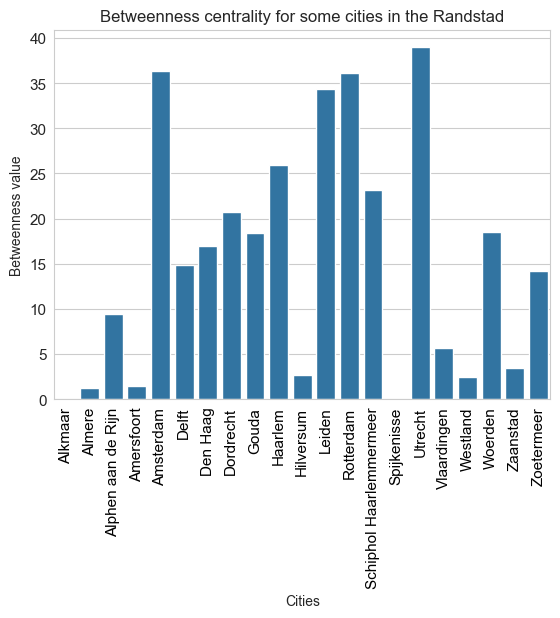

In [9]:
# Plot the values in a bar chart
G_betweenness = sns.barplot(betweenness)
G_betweenness.set_title("Betweenness centrality for some cities in the Randstad")
G_betweenness.set_xticklabels(G_betweenness.get_xticklabels(), rotation=90, color='black', ha='center')
G_betweenness.tick_params(direction='out', pad=2, labelsize=11)
G_betweenness.set(xlabel='Cities', ylabel='Betweenness value')
plt.show()

### Now let's introduce the times of the routes in our graph

The next part of this notebook will include the times of the car routes as attributes in our graph.
This allows us to do more fruitful and fun analyses!
But first we have to load them in from a xlsx sheet and create a dataframe.
Then we modify this dataframe to subtract edge attributes.
Which we then will add in our graph.
Let's go!

In [10]:
# Reading the times from the Excel sheet
randstad_car_distance = pd.read_excel('Data_files/Randstad_car_distance.xlsx')
randstad_car_times = pd.read_excel('Data_files/Randstad_car_times.xlsx')

# Clean up the DataFrame, so extraction is easier, here we make the cities columns also the indices
randstad_car_distance.set_index('Cities', inplace=True)
randstad_car_times.set_index('Cities', inplace=True)
randstad_car_times

,Alkmaar,Almere,Alphen aan de Rijn,Amersfoort,Amsterdam,Delft,Den Haag,Dordrecht,Gouda,Haarlem,...,Leiden,Rotterdam,Schiphol Haarlemmermeer,Spijkenisse,Utrecht,Vlaardingen,Westland,Woerden,Zaanstad,Zoetermeer
Cities,,,,,,,,,,,,,,,,,,,,,
Alkmaar,x,x,x,x,x,x,x,x,x,26,...,x,x,x,x,x,x,x,x,24,x
Almere,x,x,x,37,28,x,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
Alphen aan de Rijn,x,x,x,x,x,x,x,x,26,x,...,19,x,22,x,x,x,x,22,x,22
Amersfoort,x,37,x,x,38,x,x,x,x,x,...,x,x,x,x,23,x,x,x,x,x
Amsterdam,x,28,x,38,x,x,x,x,x,25,...,x,x,21,x,40,x,x,41,16,x
Delft,x,x,x,x,x,x,20,x,x,x,...,x,19,x,x,x,18,19,x,x,21
Den Haag,x,x,x,x,x,20,x,x,x,x,...,23,x,x,x,x,x,18,x,x,18
Dordrecht,x,x,x,x,x,x,x,x,x,x,...,x,27,x,x,44,x,x,x,x,x
Gouda,x,x,26,x,x,x,x,x,x,x,...,x,25,x,x,x,x,x,21,x,20


In [11]:
# This functions allows the adding of edge attributes/weights to the Randstad network, based on a delivered dataframe with these attributes and a chosen attribute name
def adding_attributes(graph, attribute_dataframe, name_attribute):    
    # Creating a dictionary to store all edges attributes in
    attribute_dictionary = {}
    
    # Use the already existing Randstad graph to look up the existing edges
    for edge in graph.edges():
        source, target = edge
        # Take the distance from the dataframe with all the car travel times
        value_attribute = attribute_dataframe.at[source, target]
        # Update those in one dictionary with edges as key and the distance as value
        attribute_dictionary.update({edge : value_attribute})
    
    
    # Update the Randstad graph with the newly configured car travel times
    nx.set_edge_attributes(graph, attribute_dictionary, name_attribute)
    
    return attribute_dictionary

distance_dictionary = adding_attributes(Randstad_Graph, randstad_car_distance, 'length')
time_dictionary = adding_attributes(Randstad_Graph, randstad_car_times, 'time')
nx.get_edge_attributes(Randstad_Graph, 'time')

{('Alkmaar', 'Haarlem'): 26,
 ('Alkmaar', 'Zaanstad'): 24,
 ('Almere', 'Amersfoort'): 37,
 ('Almere', 'Amsterdam'): 28,
 ('Almere', 'Hilversum'): 26,
 ('Alphen aan de Rijn', 'Gouda'): 26,
 ('Alphen aan de Rijn', 'Leiden'): 19,
 ('Alphen aan de Rijn', 'Schiphol Haarlemmermeer'): 22,
 ('Alphen aan de Rijn', 'Woerden'): 22,
 ('Alphen aan de Rijn', 'Zoetermeer'): 22,
 ('Amersfoort', 'Hilversum'): 23,
 ('Amersfoort', 'Utrecht'): 23,
 ('Amsterdam', 'Haarlem'): 25,
 ('Amsterdam', 'Hilversum'): 29,
 ('Amsterdam', 'Schiphol Haarlemmermeer'): 21,
 ('Amsterdam', 'Utrecht'): 40,
 ('Amsterdam', 'Woerden'): 41,
 ('Amsterdam', 'Zaanstad'): 16,
 ('Delft', 'Den Haag'): 20,
 ('Delft', 'Rotterdam'): 19,
 ('Delft', 'Vlaardingen'): 18,
 ('Delft', 'Westland'): 19,
 ('Delft', 'Zoetermeer'): 21,
 ('Den Haag', 'Leiden'): 23,
 ('Den Haag', 'Westland'): 18,
 ('Den Haag', 'Zoetermeer'): 18,
 ('Dordrecht', 'Rotterdam'): 27,
 ('Dordrecht', 'Utrecht'): 44,
 ('Gouda', 'Rotterdam'): 25,
 ('Gouda', 'Woerden'): 21,
 ('G

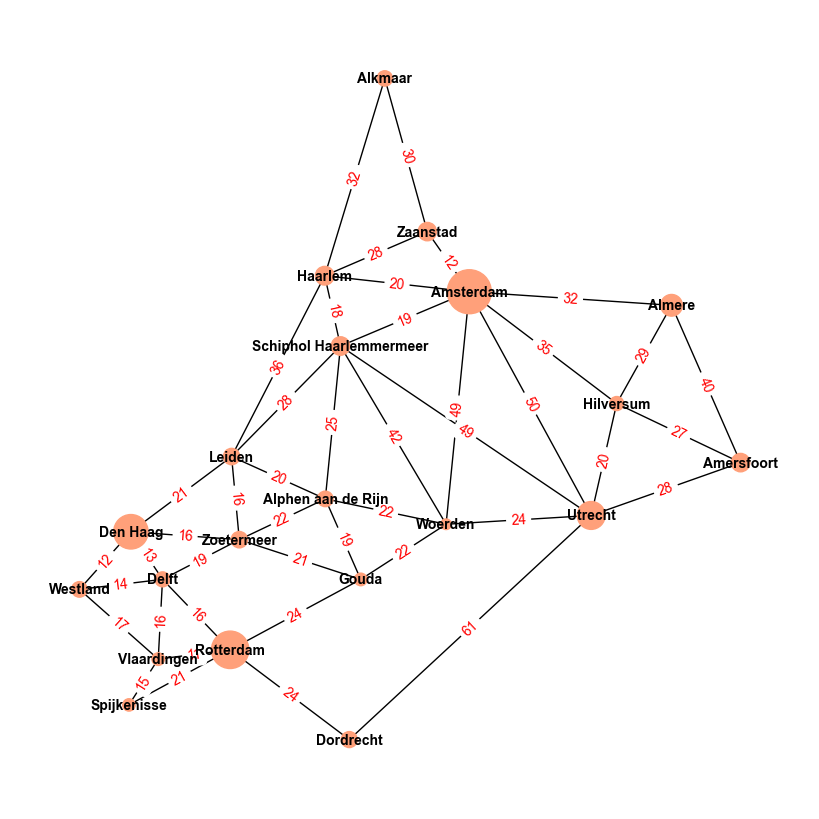

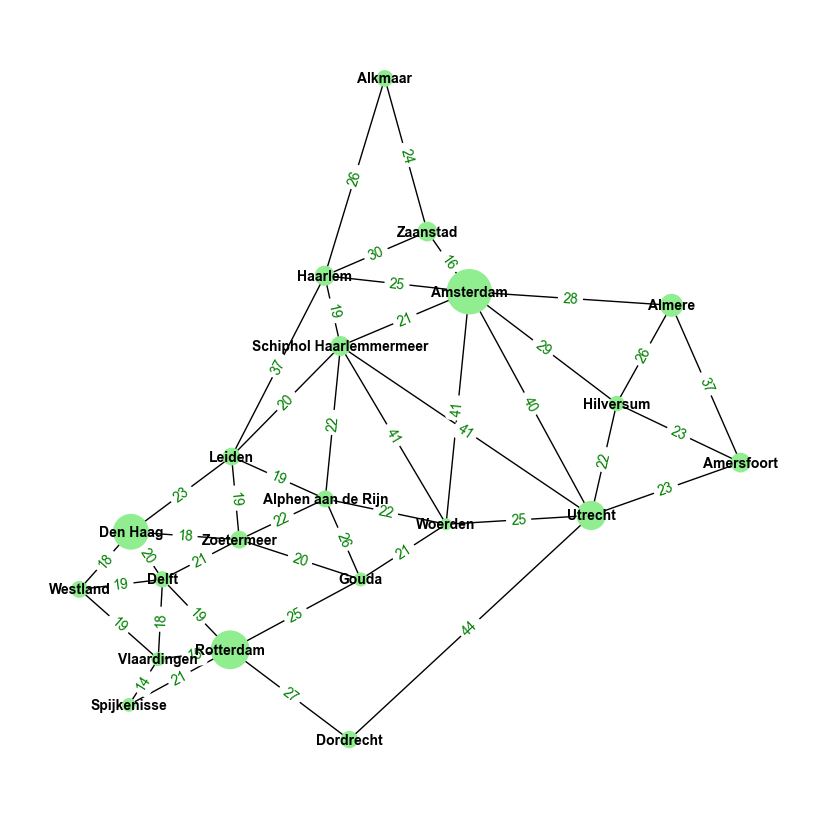

In [12]:
# Adjust the figure size as needed
plt.figure(figsize=(8, 8))

# Actually drawing the network
nx.draw(Randstad_Graph, 
        pos=pos_attributes, 
        with_labels=True, 
        node_size=[i for i in employees_attributes], 
        node_color='lightsalmon', 
        font_size=10, 
        font_color='black', 
        font_weight='bold'
        )
nx.draw_networkx_edge_labels(Randstad_Graph, 
                             pos=pos_attributes,
                             edge_labels=distance_dictionary,
                             font_color='red'
                             )
plt.axis('off')
plt.show()

# Adjust the figure size as needed
plt.figure(figsize=(8, 8))

# Actually drawing the network
nx.draw(Randstad_Graph, 
        pos=pos_attributes, 
        with_labels=True, 
        node_size=[i for i in employees_attributes], 
        node_color='lightgreen', 
        font_size=10, 
        font_color='black', 
        font_weight='bold'
        )
nx.draw_networkx_edge_labels(Randstad_Graph, 
                             pos=pos_attributes,
                             edge_labels=time_dictionary,
                             font_color='green'
                             )
plt.axis('off')
plt.show()

In [13]:
# A function to choose the quickest or shortest (depending on selected weight) path between source and target node, returns dict like object if either source and/or target is None
def shortest_path(graph, source=None, target=None, weight=None):
    short_path = nx.shortest_path(graph, source=source, target=target, weight=weight)
    return short_path

# Testing area to see whether the functions work
path1 = shortest_path(Randstad_Graph, 'Amsterdam', 'Delft', weight='length')
print(path1)
print(f'{nx.path_weight(Randstad_Graph, path1, weight='length')} km')
print(f'{nx.path_weight(Randstad_Graph, path1, weight='time')} minutes\n')

# Testing area to see whether the functions work
path2 = shortest_path(Randstad_Graph, 'Amsterdam', 'Delft', weight='time')
print(path2)
print(f'{nx.path_weight(Randstad_Graph, path2, weight='length')} km')
print(f'{nx.path_weight(Randstad_Graph, path2, weight='time')} minutes')

['Amsterdam', 'Schiphol Haarlemmermeer', 'Leiden', 'Den Haag', 'Delft']
81 km
84 minutes

['Amsterdam', 'Schiphol Haarlemmermeer', 'Leiden', 'Zoetermeer', 'Delft']
82 km
81 minutes


In [14]:
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weighted_distance = nx.edge_betweenness_centrality(Randstad_Graph,
                                                                    k=None,
                                                                    normalized=True,
                                                                    weight='length',
                                                                    seed=None)
#Calculate the weighted edge betweenness centrality, normalize
edge_betweenness_weighted_time = nx.edge_betweenness_centrality(Randstad_Graph,
                                                                k=None,
                                                                normalized=True,
                                                                weight='length',
                                                                seed=None)
print(edge_betweenness_weighted_distance)
print(edge_betweenness_weighted_time)

{('Alkmaar', 'Haarlem'): 0.06190476190476191, ('Alkmaar', 'Zaanstad'): 0.03333333333333334, ('Almere', 'Amersfoort'): 0.004761904761904762, ('Almere', 'Amsterdam'): 0.0642857142857143, ('Almere', 'Hilversum'): 0.026190476190476195, ('Alphen aan de Rijn', 'Gouda'): 0.10238095238095239, ('Alphen aan de Rijn', 'Leiden'): 0.01904761904761905, ('Alphen aan de Rijn', 'Schiphol Haarlemmermeer'): 0.10714285714285715, ('Alphen aan de Rijn', 'Woerden'): 0.03333333333333334, ('Alphen aan de Rijn', 'Zoetermeer'): 0.01904761904761905, ('Amersfoort', 'Hilversum'): 0.02380952380952381, ('Amersfoort', 'Utrecht'): 0.06666666666666668, ('Amsterdam', 'Haarlem'): 0.01904761904761905, ('Amsterdam', 'Hilversum'): 0.05238095238095239, ('Amsterdam', 'Schiphol Haarlemmermeer'): 0.16904761904761906, ('Amsterdam', 'Utrecht'): 0.01904761904761905, ('Amsterdam', 'Woerden'): 0.014285714285714287, ('Amsterdam', 'Zaanstad'): 0.1142857142857143, ('Delft', 'Den Haag'): 0.09523809523809525, ('Delft', 'Rotterdam'): 0.059

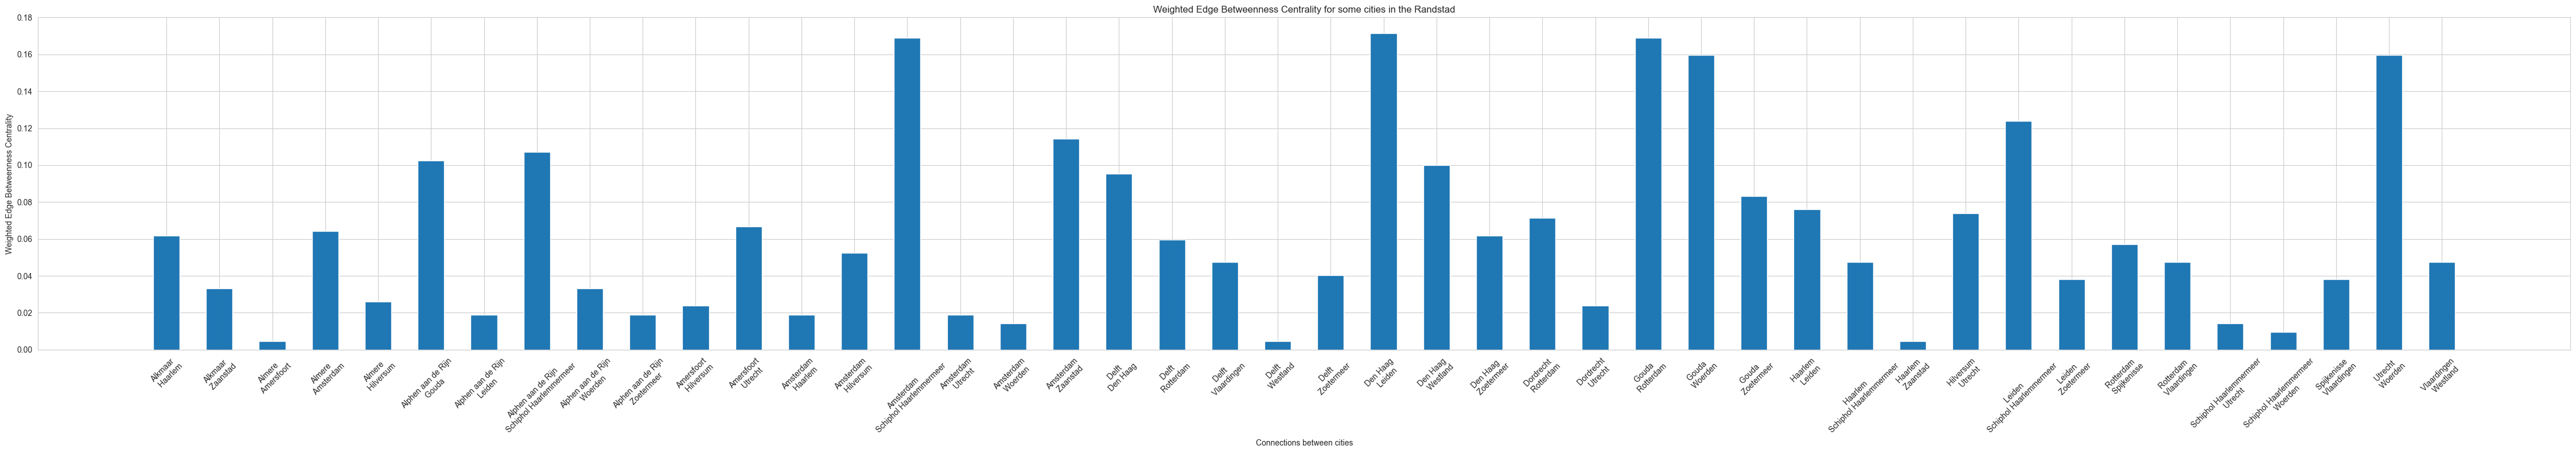

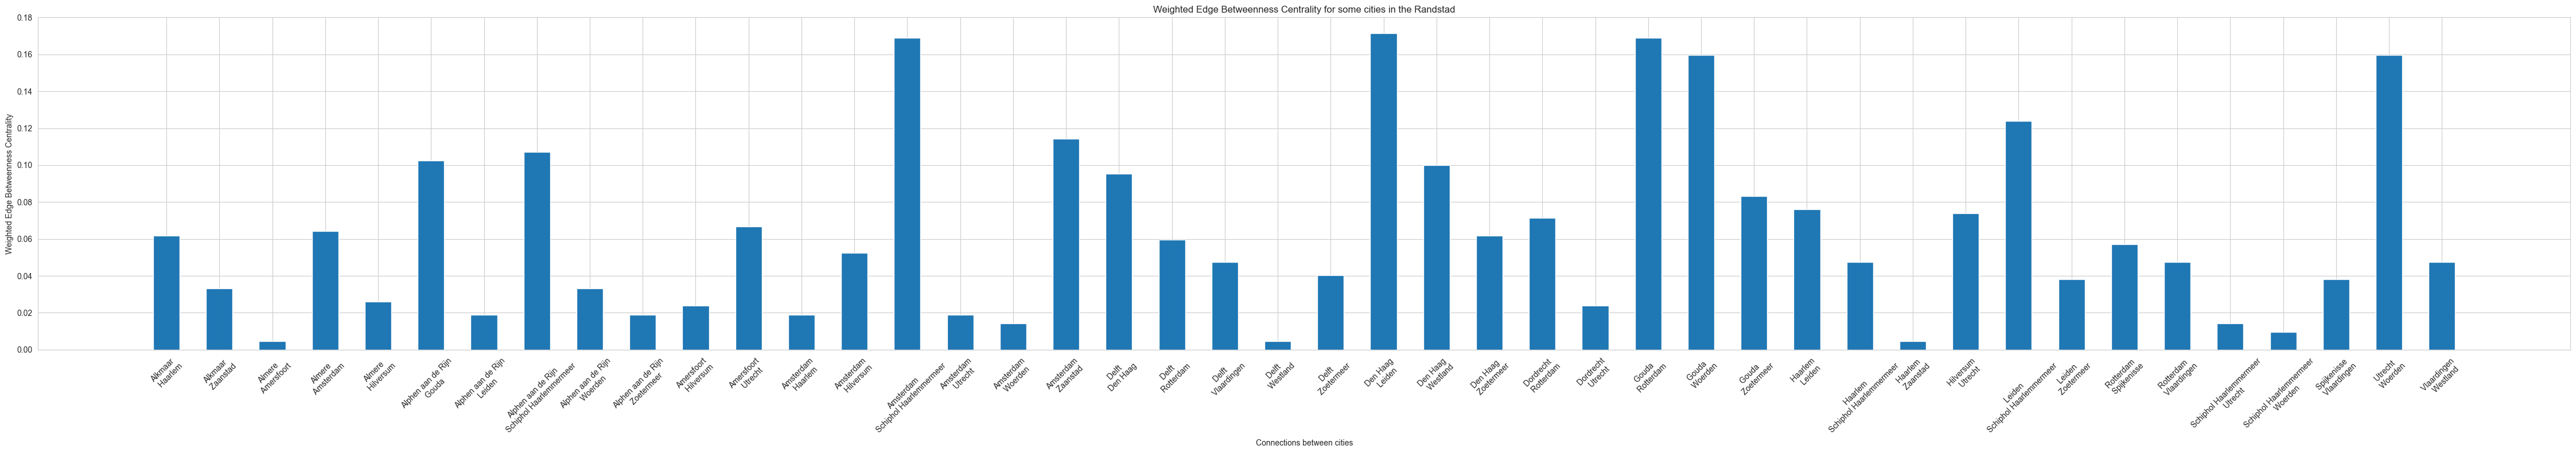

In [15]:
# Helper function for parsing the edge labels
def pp_edges(l):
    rl = []
    for i in range(len(l)):
        rl.append(str(l[i][0]) + ' \n ' + str(l[i][1]))
    return rl

# Plot the values in a bar chart
plt.figure(figsize=(45, 8))
plt.bar(range(len(edge_betweenness_weighted_distance)), edge_betweenness_weighted_distance.values(), width=0.5)
plt.xticks(range(len(edge_betweenness_weighted_distance)), pp_edges(list(edge_betweenness_weighted_distance.keys())), rotation=45, ha='center')
plt.title("Weighted Edge Betweenness Centrality for some cities in the Randstad")
plt.xlabel("Connections between cities")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.tight_layout()
plt.show()

# Plot the values in a bar chart
plt.figure(figsize=(45, 8))
plt.bar(range(len(edge_betweenness_weighted_time)), edge_betweenness_weighted_time.values(), width=0.5)
plt.xticks(range(len(edge_betweenness_weighted_time)), pp_edges(list(edge_betweenness_weighted_time.keys())), rotation=45, ha='center')
plt.title("Weighted Edge Betweenness Centrality for some cities in the Randstad")
plt.xlabel("Connections between cities")
plt.ylabel("Weighted Edge Betweenness Centrality")
plt.tight_layout()
plt.show()

C:\Users\TimEW\AppData\Local\Temp\ipykernel_20536\750033550.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  G_betweenness_distance.set_xticklabels(G_betweenness_distance.get_xticklabels(), rotation=90, color='black', ha='center')


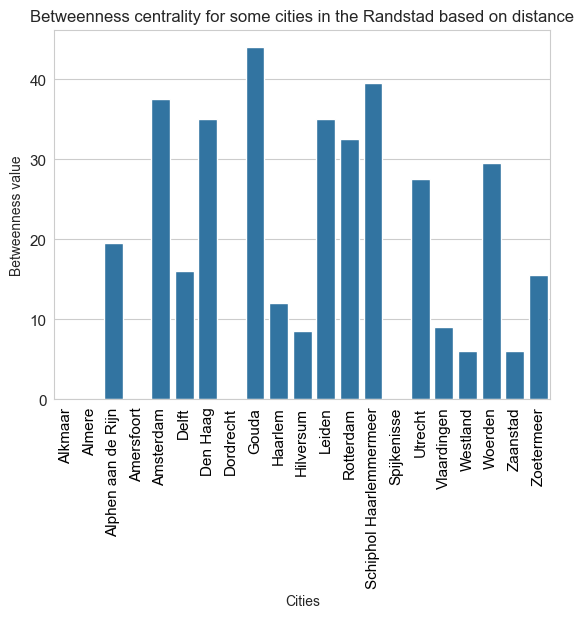

C:\Users\TimEW\AppData\Local\Temp\ipykernel_20536\750033550.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  G_betweenness_time.set_xticklabels(G_betweenness_time.get_xticklabels(), rotation=90, color='black', ha='center')


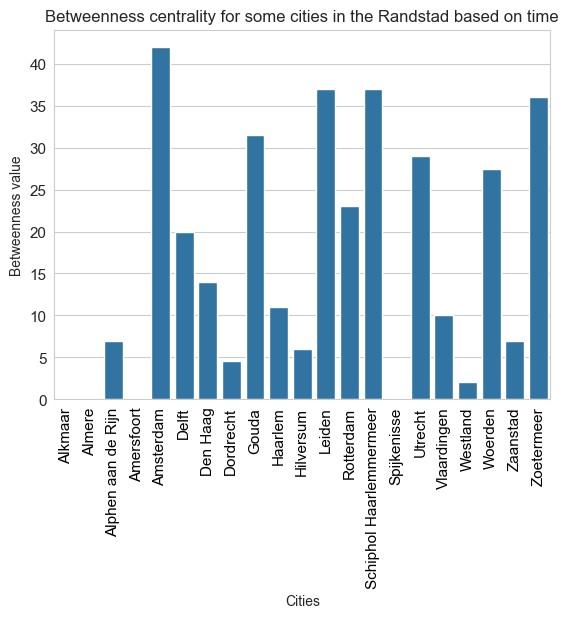

In [16]:
# Betweenness centrality with the time as factor
betweenness_distance = nx.betweenness_centrality(Randstad_Graph,
                                                 k=None,
                                                 normalized=False,
                                                 weight='length',
                                                 seed=None)

# Plot the values in a bar chart
G_betweenness_distance = sns.barplot(betweenness_distance)
G_betweenness_distance.set_title("Betweenness centrality for some cities in the Randstad based on distance")
G_betweenness_distance.set_xticklabels(G_betweenness_distance.get_xticklabels(), rotation=90, color='black', ha='center')
G_betweenness_distance.tick_params(direction='out', pad=2, labelsize=11)
G_betweenness_distance.set(xlabel='Cities', ylabel='Betweenness value')
plt.show()

# Betweenness centrality with the time as factor
betweenness_time = nx.betweenness_centrality(Randstad_Graph,
                                             k=None,
                                             normalized=False,
                                             weight='time',
                                             seed=None)

# Plot the values in a bar chart
G_betweenness_time = sns.barplot(betweenness_time)
G_betweenness_time.set_title("Betweenness centrality for some cities in the Randstad based on time")
G_betweenness_time.set_xticklabels(G_betweenness_time.get_xticklabels(), rotation=90, color='black', ha='center')
G_betweenness_time.tick_params(direction='out', pad=2, labelsize=11)
G_betweenness_time.set(xlabel='Cities', ylabel='Betweenness value')
plt.show()

### Now we are going to use two different ways to calculate the travel times or distances to two offices

With the first couple of methods, all travel times to both respective offices (read destination cities) are calculated and the minimum times with the corresponding offices are selected.

In reality though, people would only consider the travel time or distance to their nearest office. Thus, in the methods thereafter, only the travel times from each city to their respective nearest office are taken into account. Furthermore, these sophisticated functions also take into account the total amount of employees that is in each city and has to travel to their nearest office. This makes cities with lots of employees weigh more in their travel time or distance calculations to the nearest office.

These times or distances will then be minimised by investigating every possible combination of office/destination cities and picking those with the lowest total travel time or distance form each city in the graph.

In [17]:
# To involve the employees, a new dataframe is created which can be more easily manipulated
# (This is literally twenty times faster by using .at in a new dataframe than using .loc and .values conversion)
randstad_employee_table = randstad_network.copy()
randstad_employee_table.set_index('Cities', inplace=True)

# A function where only the travel time to the closest office is taken into consideration
# Furthermore the function takes into account how many employees per starting city have to travel to the closest office
# It thus calculates the total employee travel time or distance to the closest office and sums this up. 
# The weight attribute depends on the use of time or distance.
def travel_amount_car_closest_office(graph, office_1, office_2, weight):
    # Creates two dicts with all the paths to the offices from every node
    all_paths_1 = shortest_path(graph, target=office_1, weight=weight)
    all_paths_2 = shortest_path(graph, target=office_2, weight=weight)
    
    # Find for every starting node the closest office with corresponding travel time or distance and sum these together
    total_employee_amount_office_closest_office = 0
    
    for starting_city in graph.nodes():
        # The quickest paths to both offices
        path_1 = all_paths_1[starting_city]
        path_2 = all_paths_2[starting_city]
        
        # The duration or distance of these paths
        travel_amount_1 = nx.path_weight(graph, path_1, weight=weight)
        travel_amount_2 = nx.path_weight(graph, path_2, weight=weight)
        
        # Only the time or distance of the closest office is used factored by the amount of employees traveling/distance this time
        city_employees = randstad_employee_table.at[starting_city, 'Employees']
        total_employee_amount_office_closest_office += min(travel_amount_1, travel_amount_2) * city_employees
        
    return total_employee_amount_office_closest_office

print(f'The average employee travel distance with the offices, Schiphol Haarlemmermeer and Zoetermeer: {(travel_amount_car_closest_office(Randstad_Graph, 'Schiphol Haarlemmermeer', 'Zoetermeer', 'length'))/5000}')

print(f'The average employee travel time with the offices, Schiphol Haarlemmermeer and Zoetermeer: {(travel_amount_car_closest_office(Randstad_Graph, 'Schiphol Haarlemmermeer', 'Zoetermeer', 'time'))/5000}')

The average employee travel distance with the offices, Schiphol Haarlemmermeer and Zoetermeer: 29.947376345404006
The average employee travel time with the offices, Schiphol Haarlemmermeer and Zoetermeer: 30.79233376912399


In [18]:
import itertools

# This function finds the combination of offices with the least amount of travel to the office of all employees. It looks per combination per city what the closest office is and weighs this with the amount of employees for said city. The combination that results in the lowest travel amount weighted for each starting city with corresponding employee numbers is given as output, including the average travel amount for all employees to their nearest office and the total minimal travel amount per employee. Only the closest office is taken into consideration per starting city. The weight attribute depends on the use of time or distance.
def minimise_travel_amount_closest_office(graph, employee_table, weight):
    # Set up the minimum travel amount of both offices
    minimum_travel_amount_all_employees = np.inf
    selected_office_1 = ''
    selected_office_2 = ''
    average_travel_amount_selected_office_1 = 0
    average_travel_amount_selected_office_2 = 0
    
    # Create a list of all possible office combinations in all cities, the offices need to be in two different cities. This uses a tool called itertools combinations, which creates all unique possible combinations out of a list of unique elements.
    office_list = [i for i in graph.nodes()]
    office_combinations = itertools.combinations(office_list, 2)
    
    # Run through these combinations to find the minimum travel time and the corresponding offices
    for combination in office_combinations:
        # Get the office from the combination
        office_1, office_2 = combination
        
        # Travel amount from selected city for all employees from said city
        total_employee_travel_amount_office_1 = 0
        total_employee_travel_amount_office_2 = 0
        employees_office_1 = 0
        employees_office_2 = 0
    
        for i, city in enumerate(graph.nodes()):
            
            # It looks at the amount of employees that have to travel to this office
            city_employees = employee_table.at[city, 'Employees']
            
            # Paths to both offices
            path_1 = shortest_path(graph, source=city, target=office_1, weight=weight)
            path_2 = shortest_path(graph, source=city, target=office_2, weight=weight)
            
            # The duration of these paths
            travel_amount_1 = nx.path_weight(graph, path_1, weight=weight)
            travel_amount_2 = nx.path_weight(graph, path_2, weight=weight)
            
            # If office one is closer, the node gets recolored, the other ones (to office 2) keep their color
            if travel_amount_1 > travel_amount_2:
                total_employee_travel_amount_office_2 += travel_amount_2 * city_employees
                employees_office_2 += city_employees            
            else:
                total_employee_travel_amount_office_1 += travel_amount_1 * city_employees
                employees_office_1 += city_employees
        
        average_travel_amount_office_1 = total_employee_travel_amount_office_1 / employees_office_1
        average_travel_amount_office_2 = total_employee_travel_amount_office_2 / employees_office_2
        
        total_amount_all_offices = total_employee_travel_amount_office_1 + total_employee_travel_amount_office_2
        
        if minimum_travel_amount_all_employees > total_amount_all_offices: 
            minimum_travel_amount_all_employees = total_amount_all_offices
            average_travel_amount_selected_office_1 = average_travel_amount_office_1
            average_travel_amount_selected_office_2 = average_travel_amount_office_2
            selected_office_1 = office_1
            selected_office_2 = office_2
            
    return selected_office_1,average_travel_amount_selected_office_1,selected_office_2,average_travel_amount_selected_office_2,minimum_travel_amount_all_employees

selected_office_1,average_travel_amount_selected_office_1_distance,selected_office_2,average_travel_amount_selected_office_2_distance,minimum_travel_distance_all_employees = minimise_travel_amount_closest_office(Randstad_Graph, randstad_employee_table, 'length')

selected_office_1_time,average_travel_amount_selected_office_1,selected_office_2_time,average_travel_amount_selected_office_2,minimum_travel_time_all_employees = minimise_travel_amount_closest_office(Randstad_Graph, randstad_employee_table, 'time')

print(f'The minimised employee travel distance resulted in the offices: {selected_office_1} and {selected_office_2}\nWith and average employee travel distance of : {minimum_travel_distance_all_employees/5000} kilometer')
print('\n')
print(f'The minimised employee travel time resulted in the offices: {selected_office_1_time} and {selected_office_2_time}\nWith and average employee travel time of : {minimum_travel_time_all_employees/5000} minutes')

The minimised employee travel distance resulted in the offices: Amsterdam and Delft
With and average employee travel distance of : 21.124101240707997 kilometer


The minimised employee travel time resulted in the offices: Amsterdam and Rotterdam
With and average employee travel time of : 21.780312804436 minutes


### Now we start plotting

But first let's make some auxiliary functions

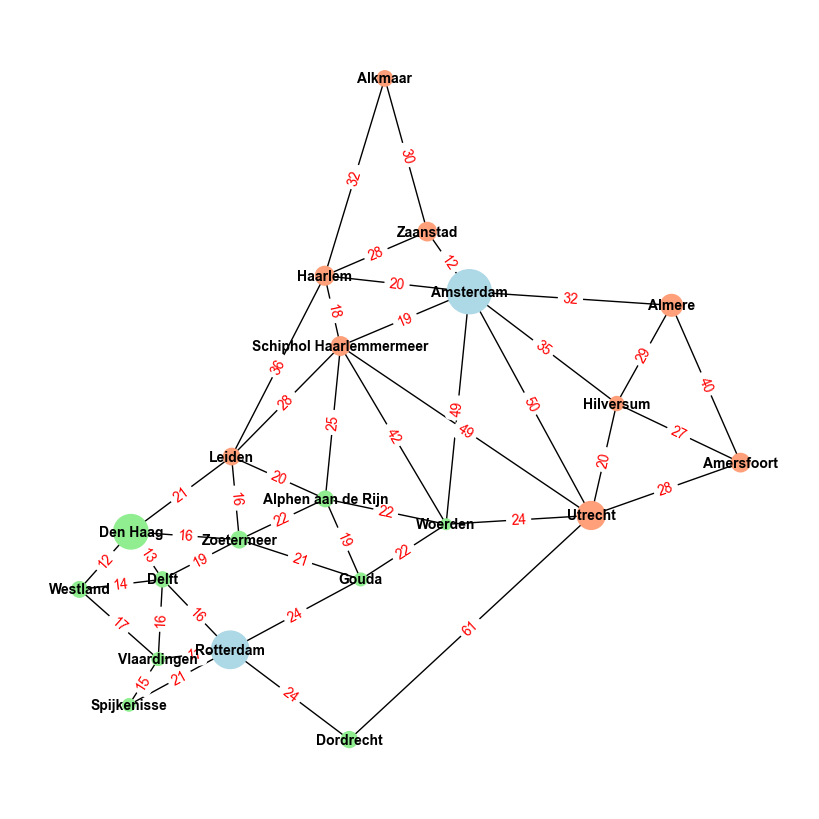

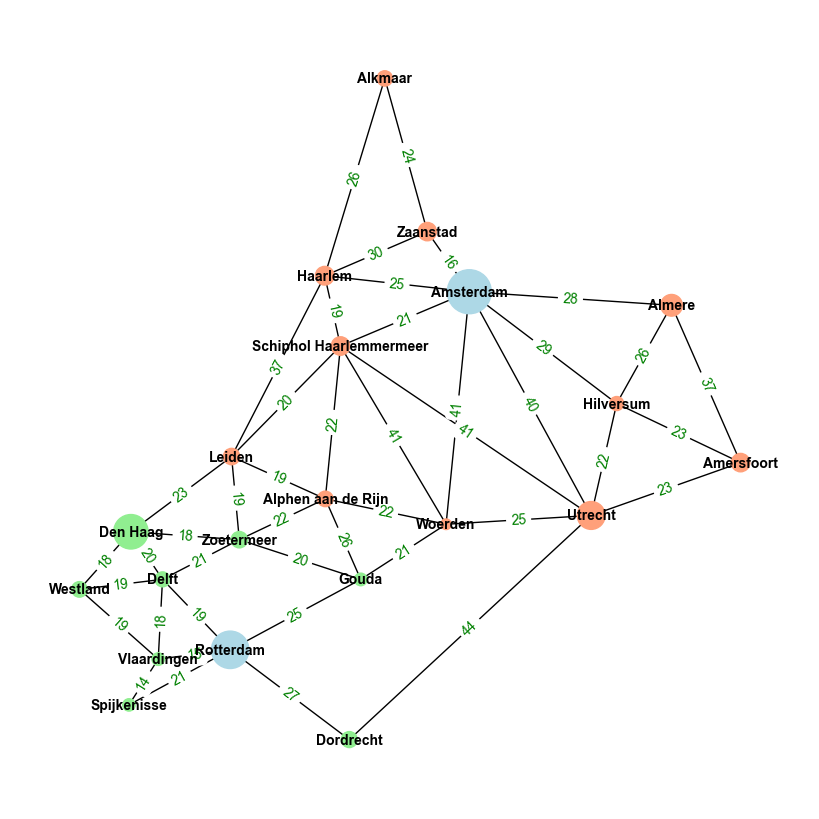

In [19]:
# A function that gives each node/city in the graph a color, one for the selected offices / destination nodes, the other for the closest to office one and the last for the closest to office two. The weight attribute depends on the use of time or distance.
def coloring_nodes_offices(graph, office_1, office_2, weight):
    node_color_list = []
    for i, city in enumerate(graph.nodes()):
        node_color_list.append('lightsalmon')
        if city in [office_1, office_2]:
            node_color_list[i] = 'lightblue'
        else:
            # Paths to both offices
            path_1 = shortest_path(graph, source=city, target=office_1, weight=weight)
            path_2 = shortest_path(graph, source=city, target=office_2, weight=weight)
            
            # The duration of these paths
            travel_amount_1 = nx.path_weight(graph, path_1, weight=weight)
            travel_amount_2 = nx.path_weight(graph, path_2, weight=weight)
            # If office one is closer, the node gets recolored, the other ones (to office 1) keep their color
            if travel_amount_1 > travel_amount_2:
                node_color_list[i] = 'lightgreen'
                
    return node_color_list

color_list_distance = coloring_nodes_offices(Randstad_Graph, 'Amsterdam', 'Rotterdam', 'length')
color_list_time = coloring_nodes_offices(Randstad_Graph, 'Amsterdam', 'Rotterdam', 'time')

# Adjust the figure size as needed
plt.figure(figsize=(8, 8))

# Actually drawing the network
nx.draw(Randstad_Graph, 
        pos=pos_attributes, 
        with_labels=True, 
        node_size=[i for i in employees_attributes], 
        node_color=color_list_distance, 
        font_size=10, 
        font_color='black', 
        font_weight='bold'
        )
nx.draw_networkx_edge_labels(Randstad_Graph, 
                             pos=pos_attributes,
                             edge_labels=distance_dictionary,
                             font_color='red'
                             )
plt.axis('off')
plt.show()


# Adjust the figure size as needed
plt.figure(figsize=(8, 8))

# Actually drawing the network
nx.draw(Randstad_Graph, 
        pos=pos_attributes, 
        with_labels=True, 
        node_size=[i for i in employees_attributes], 
        node_color=color_list_time, 
        font_size=10, 
        font_color='black', 
        font_weight='bold'
        )
nx.draw_networkx_edge_labels(Randstad_Graph, 
                             pos=pos_attributes,
                             edge_labels=time_dictionary,
                             font_color='green'
                             )
plt.axis('off')
plt.show()


In [20]:
# To involve the employees, a new dataframe is created which can be more easily manipulated
# (This is literally twenty times faster by using .at in a new dataframe than using .loc and .values conversion)
randstad_employee_table = randstad_network.copy()
randstad_employee_table.set_index('Cities', inplace=True)

# Function that only takes one office into consideration and calculates the travel amount to said one office.
def one_office(graph, employee_table, weight):
    
    # First define the desired variables
    total_path_amount = np.inf
    closest_office = ''
    
    # For each office in the graph do the calculations
    for office in graph.nodes():
        
        # For every office it restarts the travel counter
        total_employee_travel_amount = 0
        
        # For each city in the graph it calculates and sums the time towards this office
        for start_city in graph.nodes():
            
            # It looks at the amount of employees that have to travel to this office
            city_employees = employee_table.at[start_city, 'Employees']
            
            short_path = shortest_path(graph, source=start_city, target=office, weight=weight)
            total_employee_travel_amount += nx.path_weight(graph, short_path, weight=weight) * city_employees
            
        if total_path_amount > total_employee_travel_amount:
            total_path_amount = total_employee_travel_amount
            closest_office = office
    
    # It corrects the office travel amount for the total amount of employees
    total_path_amount = total_path_amount/5000
    
    return total_path_amount, closest_office
        
time, most_desired = one_office(Randstad_Graph, randstad_employee_table, 'length')
print(f'The most desired office is {most_desired} with a travel time of {time} minutes\n')

The most desired office is Schiphol Haarlemmermeer with a travel time of 44.827703880604 minutes


In [21]:
# FOR THE SAKE OF CLARITY, THIS DATAFRAME IS USED IN THIS CELL AND THUS PASTED HERE AGAIN
randstad_employee_table = randstad_network.copy()
randstad_employee_table.set_index('Cities', inplace=True)


# A function that gives the travel amounts to the closest office only and the average travel amount and also two list of cities each for their closest office respectively
def average_amount_per_office(graph, employee_table, office_1, office_2, weight):
    # All nodes to their closest office
    node_list_office_1 = []
    node_list_office_2 = []
    
    # Travel amount from selected city for all employees from said city
    total_employee_travel_amount_office_1 = 0
    total_employee_travel_amount_office_2 = 0
    employees_office_1 = 0
    employees_office_2 = 0
    
    for i, city in enumerate(graph.nodes()):
        
        # It looks at the amount of employees that have to travel to this office
        city_employees = employee_table.at[city, 'Employees']
        
        # Paths to both offices
        path_1 = shortest_path(graph, source=city, target=office_1, weight=weight)
        path_2 = shortest_path(graph, source=city, target=office_2, weight=weight)
        
        # The duration of these paths
        travel_amount_1 = nx.path_weight(graph, path_1, weight=weight)
        travel_amount_2 = nx.path_weight(graph, path_2, weight=weight)
        
        # If office one is closer, the node gets recolored, the other ones (to office 2) keep their color
        if travel_amount_1 > travel_amount_2:
            node_list_office_2.append(city)
            total_employee_travel_amount_office_2 += travel_amount_2 * city_employees
            employees_office_2 += city_employees            
        else:
            node_list_office_1.append(city)
            total_employee_travel_amount_office_1 += travel_amount_1 * city_employees
            employees_office_1 += city_employees
            
    average_travel_amount_office_1 = total_employee_travel_amount_office_1 / employees_office_1
    average_travel_amount_office_2 = total_employee_travel_amount_office_2 / employees_office_2
    
    return node_list_office_1, average_travel_amount_office_1, node_list_office_2, average_travel_amount_office_2

average_amount_per_office(Randstad_Graph, randstad_employee_table, 'Amsterdam', 'Rotterdam', 'time')

(['Alkmaar',
  'Almere',
  'Alphen aan de Rijn',
  'Amersfoort',
  'Amsterdam',
  'Haarlem',
  'Hilversum',
  'Leiden',
  'Schiphol Haarlemmermeer',
  'Utrecht',
  'Woerden',
  'Zaanstad'],
 22.169742713162904,
 ['Delft',
  'Den Haag',
  'Dordrecht',
  'Gouda',
  'Rotterdam',
  'Spijkenisse',
  'Vlaardingen',
  'Westland',
  'Zoetermeer'],
 21.241215674138545)

### Part 2, A closer study to the Rotterdam Area

In this graph we will work with a new graph about the Rotterdam area and study the connectivity and travel amounts here. The values about employer numbers and connections types can be taken from the previous part. Furthermore, we will study different types of modularity in this local network.

<br>

Continue with one of the cities you have chosen in the previous questions and investigate the trade-off between settling in a central location close to a major trainstation or in a more peripheral location close to a highway. 

Investigate the influence of travel time of the company’s employees for two modalities: commuting via road or using public transport.Tip:  investigate the average commute time per employee to the central or peripheral location, assuming the number of employees from a certain city working at the company is proportional to the city population’s share within the Randstad.  

Start with all employees using only one type modality and continue with a mix of modalities until you find the threshold where both locations are as suitable. If you want you can add information to the model, either by using one of the resources given below or by other relevant information you found yourself (refer to the sources you use!).

In [22]:
# Read in the Excel file as a dataframe
Rotterdam_train_pd = pd.read_excel('Data_files/Rotterdam_train_adjacency.xlsx')
Rotterdam_car_pd = pd.read_excel('Data_files/Rotterdam_car_adjacency.xlsx')

# Show contents of the dataframe
Rotterdam_car_pd
Rotterdam_train_pd

,Locations,Latitude,Longitude,Population,Employees,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Delft,51.99900,4.362800,106086,111.394368,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
1,Den Haag,52.07050,4.300700,562839,591.002531,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,Dordrecht,51.81330,4.690500,121434,127.510356,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,Gouda,52.01670,4.708300,75316,79.084688,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,Rotterdam Alexander,51.95220,4.551900,110650,116.186743,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
5,Rotterdam Blaak,51.92000,4.489100,110650,116.186743,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0
6,Rotterdam Centraal,51.92250,4.479400,110650,116.186743,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0
7,Rotterdam Lombardijen,51.88060,4.531400,110650,116.186743,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
8,Rotterdam Noord,51.94210,4.481500,110650,116.186743,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
9,Rotterdam Zuid,51.90500,4.509800,110650,116.186743,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [23]:
# Make graphs from the dataframes
Rotterdam_train_adjacency = Rotterdam_train_pd.iloc[:, 5:]
Rotterdam_train_adjacency
Rotterdam_train_graph = nx.from_pandas_adjacency(Rotterdam_train_adjacency)

Rotterdam_car_adjacency = Rotterdam_car_pd.iloc[:, 5:]
Rotterdam_car_adjacency
Rotterdam_car_graph = nx.from_pandas_adjacency(Rotterdam_car_adjacency)

In [24]:
# Giving the nodes the location names

# Getting the city names from the original dataframe
location_names_train = []
for location in Rotterdam_train_pd['Locations']:
    location_names_train.append(location)

# Renaming the nodes in the created graphs
for i in range(len(location_names_train)):
    nx.relabel_nodes(Rotterdam_train_graph, {i: location_names_train[i]}, copy=False)

# Also fixing/renaming the original dataframe
for i,name in enumerate(location_names_train):
    Rotterdam_train_adjacency.rename(columns={i: name}, inplace=True)

# Checking whether the nodes have the desired names
print(nx.nodes(Rotterdam_train_graph))


# Getting the city names from the original dataframe
location_names_car = []
for location in Rotterdam_car_pd['Locations']:
    location_names_car.append(location)

# Renaming the nodes in the created graphs
for i in range(len(location_names_car)):
    nx.relabel_nodes(Rotterdam_car_graph, {i: location_names_car[i]}, copy=False)

# Also fixing/renaming the original dataframe
for i,name in enumerate(location_names_car):
    Rotterdam_car_adjacency.rename(columns={i: name}, inplace=True)

# Checking whether the nodes have the desired names
print(nx.nodes(Rotterdam_car_graph))

['Delft', 'Den Haag', 'Dordrecht', 'Gouda', 'Rotterdam Alexander', 'Rotterdam Blaak', 'Rotterdam Centraal', 'Rotterdam Lombardijen', 'Rotterdam Noord', 'Rotterdam Zuid', 'Schiedam', 'Spijkenisse', 'Vlaardingen', 'Westland', 'Zoetermeer']
['Delft', 'Den Haag', 'Dordrecht', 'Gouda', 'Rotterdam Alexander', 'Rotterdam Blaak', 'Rotterdam Central Station', 'Rotterdam Lombardijen', 'Rotterdam Noord', 'Rotterdam Zuid', 'Schiedam', 'Spijkenisse', 'Vlaardingen', 'Westland', 'Zoetermeer']


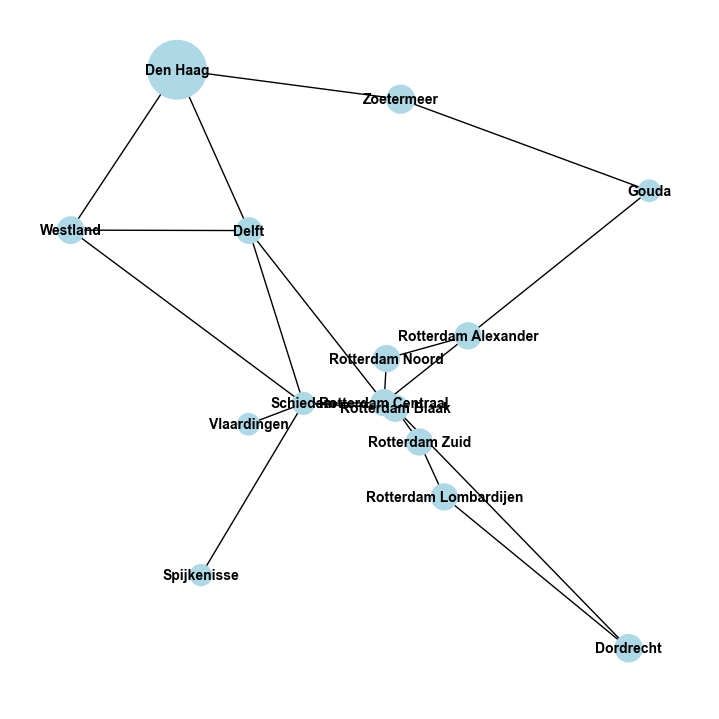

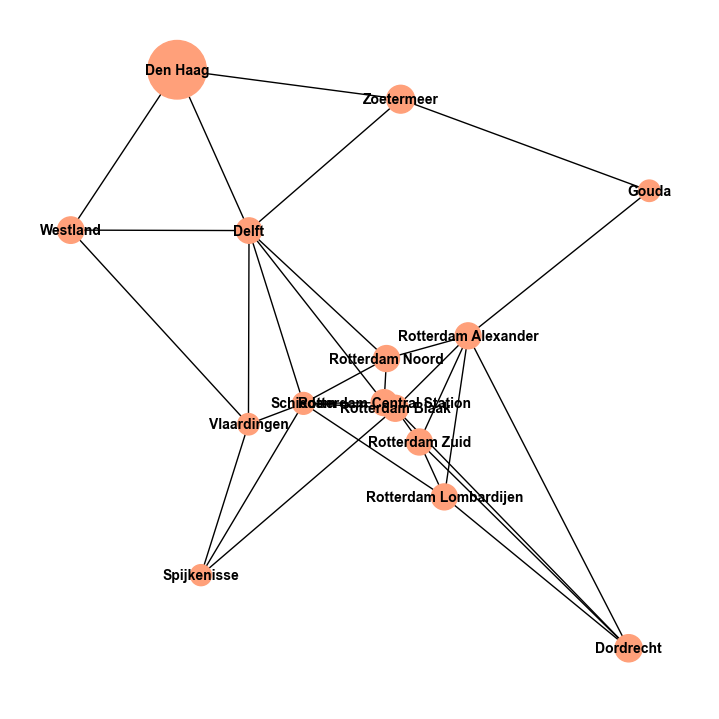

In [25]:
# Plotting the graphs

# Gathering attributes for the graph
pos_attributes_train = {}
pos_attributes_car = {}
employees_attributes = []  # For node size drawing, this must be list with data ordered in the order of nodes in the graph


for location in Rotterdam_train_graph.nodes():
    # The coordinates
    latitude = Rotterdam_train_pd.loc[Rotterdam_train_pd['Locations'] == location, 'Latitude'].iloc[0]
    longitude = Rotterdam_train_pd.loc[Rotterdam_train_pd['Locations'] == location, 'Longitude'].iloc[0]
    pos_attributes_train.update({location: (longitude, latitude)})
    
for location in Rotterdam_car_graph.nodes():
    # The coordinates
    latitude = Rotterdam_car_pd.loc[Rotterdam_car_pd['Locations'] == location, 'Latitude'].iloc[0]
    longitude = Rotterdam_car_pd.loc[Rotterdam_car_pd['Locations'] == location, 'Longitude'].iloc[0]
    pos_attributes_car.update({location: (longitude, latitude)})
    
    # The employees
    employees = Rotterdam_car_pd.loc[Rotterdam_car_pd['Locations'] == location, 'Employees'].iloc[0]
    employees_attributes.append(employees)

    
# Plotting the figures

plt.figure(figsize=(7, 7))

# Actually drawing the network
nx.draw(Rotterdam_train_graph, 
        pos=pos_attributes_train, 
        with_labels=True, 
        node_size=[3 * i for i in employees_attributes], 
        node_color='lightblue', 
        font_size=10, 
        font_color='black', 
        font_weight='bold'
        )
plt.show()


plt.figure(figsize=(7, 7))

# Actually drawing the network
nx.draw(Rotterdam_car_graph, 
        pos=pos_attributes_car, 
        with_labels=True, 
        node_size=[3 * i for i in employees_attributes], 
        node_color='lightsalmon', 
        font_size=10, 
        font_color='black', 
        font_weight='bold'
        )
plt.show()